# Predicting Forest Fire Damage Area Using Environmental Data

#### Purpose: To predict forest fire damage areas using environmental and fire-related data to aid in fire impact forecasting, resource management, and ensuring the safety of people in affected regions.

Features of Dataset:

<pre>
occurgm: Region where the fire occurred
occurdt: Date of the fire occurrence
extingtm: Time taken to extinguish the fire
tempavg: Average temperature
windavg: Average wind speed
rainamount: Amount of rainfall
raindays: Number of rainy days
humidrel: Relative humidity
dmgarea: Damage area caused by the fire
</pre>

## 1. Data Loading and Exploration

I first imported the essential libraries for data analysis and visualization. 

Matplotlib parameters ensure proper display of Korean characters and prevent issues with negative signs on the plots. 

In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set parameters to display Korean characters
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

Load an Excel file containing forest fire data into a pandas DataFrame.

In [2]:
# Load the dataset 
df = pd.read_excel("C:/Users/82109/Desktop/Wildfire_size_forecast/프로젝트/ForestFire.xlsx")
df

occurgm  occurdt  extingtm  tempavg  windavg  rainamount  raindays  \
0         북부     2010       300     23.6      1.9         0.5         6   
1         경남     2010       210     29.6      2.4         1.5         6   
2         강원     2010       310     29.3      1.3         0.5         2   
3         전북     2010       140     25.3      3.3         1.5         3   
4         북부     2010       242     22.3      2.0         0.5         1   
...      ...      ...       ...      ...      ...         ...       ...   
3943      강원     1990        30      8.2      1.3        19.0        13   
3944      강원     1990        20     -0.1      5.0         1.9         8   
3945      강원     1990        40     -0.6      1.0         5.5         8   
3946      강원     1990        20      0.4      1.3         1.6         8   
3947      강원     1990        50      8.4      1.7        31.5        20   

      humidrel  dmgarea  
0         57.0     0.19  
1         46.0     0.08  
2         57.0     0.05  
3         46.0     0.03  
4         40.0     0.01  
...        ...      ...  
3943      33.0     0.20  
3944      34.0     0.30  
3945      47.0     0.30  
3946      30.0     0.30  
3947      52.0     0.02  

[3948 rows x 9 columns]

Create histograms for all numerical columns in the dataset to visualize their distributions.

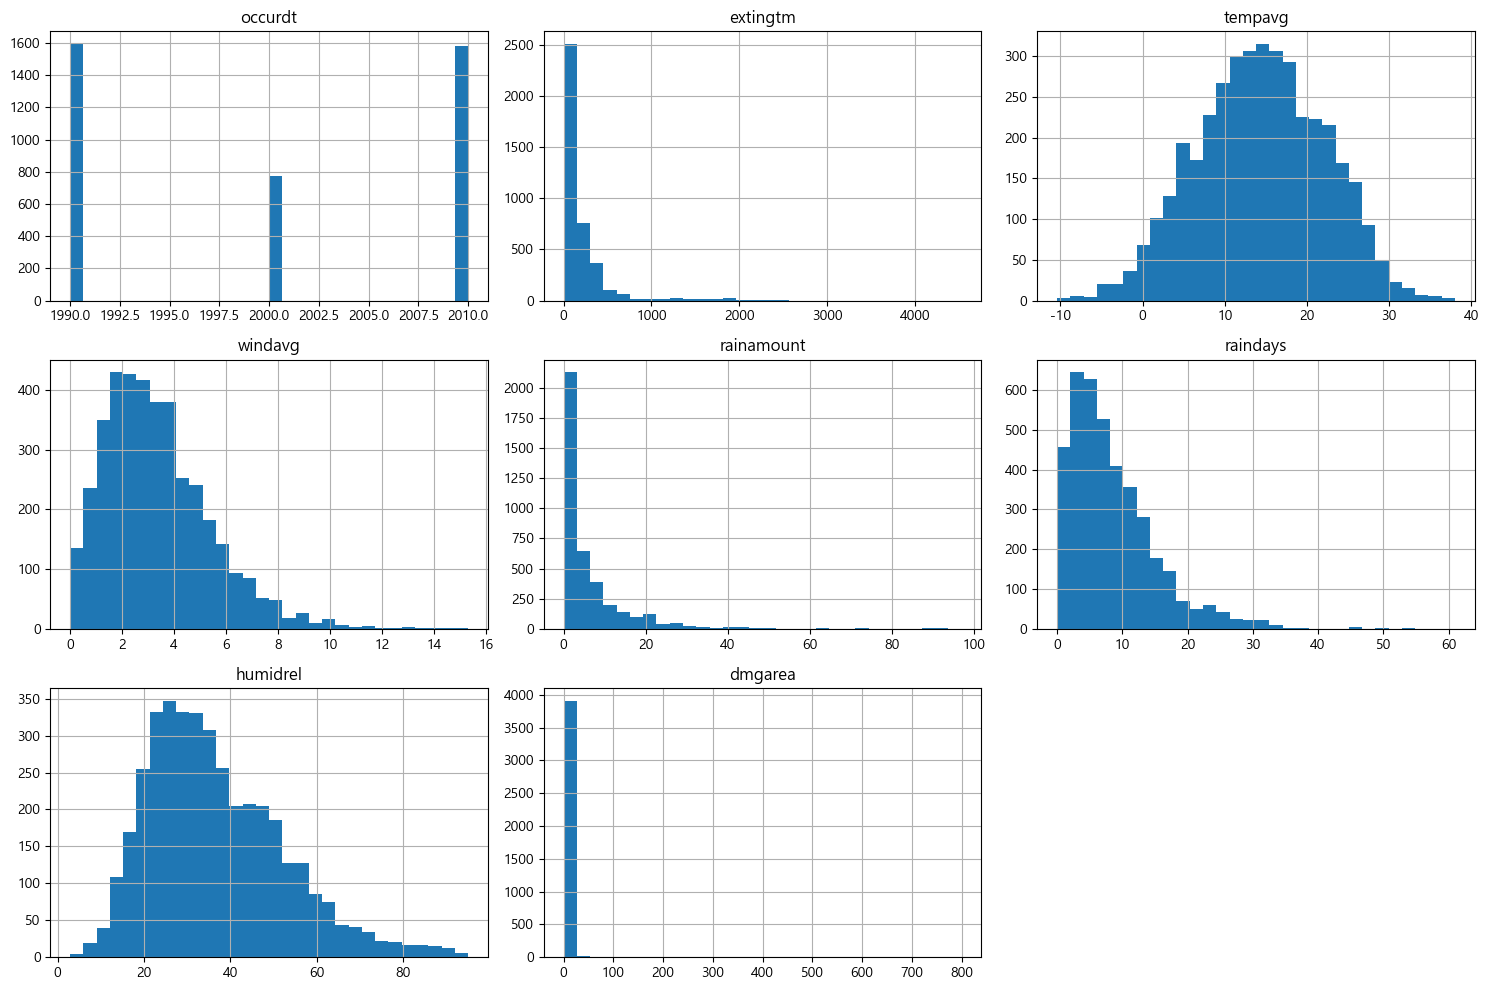

In [3]:
# Visualize features with histograms
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

## 2. Data Cleaning and Outlier Removal

In this code block, I first defined a dictionary addr_aliases that maps Korean province names to their English equivalents to standardize location data. 

I then used the replace() method to apply these aliases to the occurgm column in the DataFrame. 

In [4]:
# define dictionary to convert Korean to English
addr_aliases = {
    '경기': 'Gyeonggi-do', '경남': 'Gyeongnam', '경북': 'Gyeongbuk', '충북': 'Chungbuk', '서울': 'Seoul', 
    '부산특별시': 'Busan', '대전시': 'Daejeon', '충남': 'Chungnam', '전남': 'Jeonnam', '전북': 'Jeonbuk', 
    '강원': 'Gangwon-do', '부산': 'Gyeongnam', '대구': 'Gyeongbuk', '울산': 'Gyeongnam', '인천': 'Incheon',
    '세종': 'Chungbuk', '광주': 'Jeonnam', '대전': 'Chungbuk', '북부': 'Gangwon-do', '서부': 'Chungnam',
    '남부': 'Jeonnam', '동부': 'Gyeongnam', '중부': 'Chungbuk', '제주': 'Jeju'}

df['occurgm'] = df['occurgm'].replace(addr_aliases)

Afterward, I filtered the dataset to remove outliers based on the histograms above and I was able to retain 75% of the data.

In [5]:
# Remove outliers 
df = df[
    (df['raindays'] <= 30) &
    (df['rainamount'] <= 20) &
    (df['dmgarea'] <= 3)&
    (df['humidrel'] <= 80) &
    (df['windavg'] <= 10) &
    (df['extingtm'] <= 400)  
]

print(f"Shape of the DataFrame after removing outliers: {df.shape}")
df

Shape of the DataFrame after removing outliers: (2923, 9)


occurgm  occurdt  extingtm  tempavg  windavg  rainamount  raindays  \
0     Gangwon-do     2010       300     23.6      1.9         0.5         6   
1      Gyeongnam     2010       210     29.6      2.4         1.5         6   
2     Gangwon-do     2010       310     29.3      1.3         0.5         2   
3        Jeonbuk     2010       140     25.3      3.3         1.5         3   
4     Gangwon-do     2010       242     22.3      2.0         0.5         1   
...          ...      ...       ...      ...      ...         ...       ...   
3942  Gangwon-do     1990        30      8.2      0.7         1.9        13   
3943  Gangwon-do     1990        30      8.2      1.3        19.0        13   
3944  Gangwon-do     1990        20     -0.1      5.0         1.9         8   
3945  Gangwon-do     1990        40     -0.6      1.0         5.5         8   
3946  Gangwon-do     1990        20      0.4      1.3         1.6         8   

      humidrel  dmgarea  
0         57.0     0.19  
1         46.0     0.08  
2         57.0     0.05  
3         46.0     0.03  
4         40.0     0.01  
...        ...      ...  
3942      33.0     0.05  
3943      33.0     0.20  
3944      34.0     0.30  
3945      47.0     0.30  
3946      30.0     0.30  

[2923 rows x 9 columns]

I displayed the shape of the DataFrame to confirm that the outliers were properly removed and to plan how I will cluster the dataset.

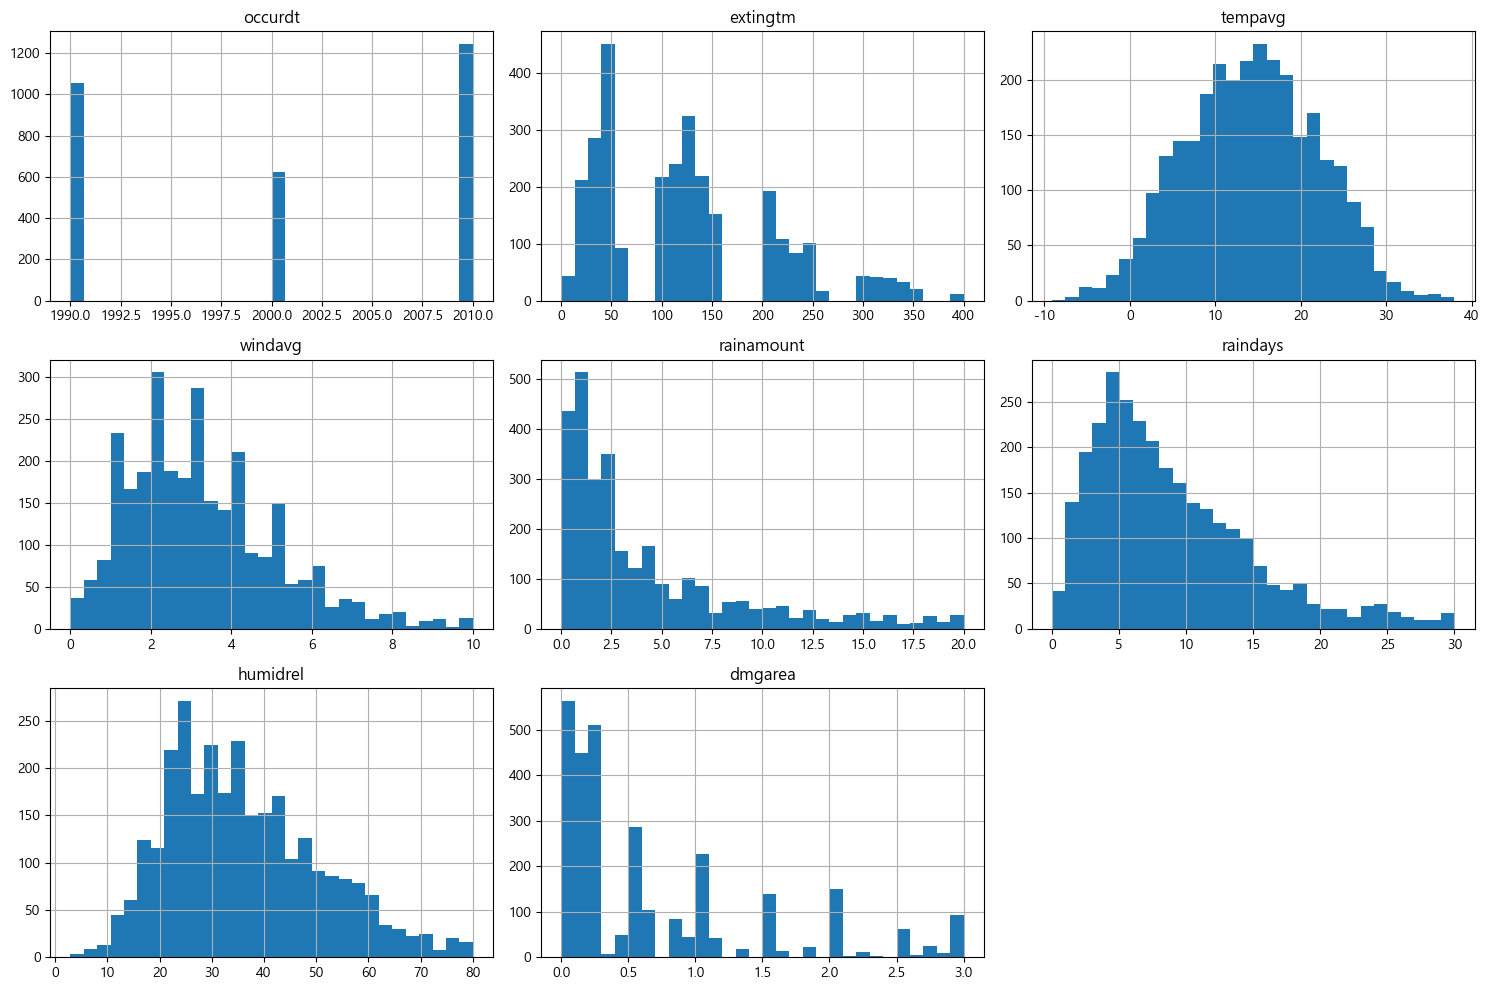

In [6]:
# Histograms after data preprocessing
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

## 3. Handling Missing and Zero Values

In this code block, I first checked for missing values in the dataset to identify and address any potential errors.

In [7]:
df.isnull().sum()

occurgm       0
occurdt       0
extingtm      0
tempavg       0
windavg       0
rainamount    0
raindays      0
humidrel      0
dmgarea       0
dtype: int64

I also calculated the number of zero values in each column for the same purpose and found out 92 values were zeroes.

In [8]:
zero_counts = (df == 0).sum()

print(zero_counts)

occurgm        0
occurdt        0
extingtm       3
tempavg        1
windavg       14
rainamount    30
raindays      42
humidrel       0
dmgarea        2
dtype: int64


So, I replaced these columns with Nan to treat them as missing values. I filled the NaN values with the mean of each column to handle missing data more effectively. 

In [9]:
numeric_columns = ['extingtm', 'tempavg', 'windavg', 'rainamount', 'raindays', 'humidrel', 'dmgarea']
df[numeric_columns] = df[numeric_columns].replace(0, np.nan)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

zero_counts = (df == 0).sum()
print(zero_counts)

occurgm       0
occurdt       0
extingtm      0
tempavg       0
windavg       0
rainamount    0
raindays      0
humidrel      0
dmgarea       0
dtype: int64


C:\Users\82109\AppData\Local\Temp\ipykernel_1700\2931313504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].replace(0, np.nan)
C:\Users\82109\AppData\Local\Temp\ipykernel_1700\2931313504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


## 4. Feature Importance Analysis

First, split the data into training and testing sets, with 30% of the data used for testing. Then, initializied and fit the model to the training data.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Exclude the first two features (Occured Area & Year)
X = df.iloc[:, 2:-1].values  

# Target Variable
y = df['dmgarea']    

feat_labels = df.columns[2:-1].tolist() 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

forest = RandomForestRegressor(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

Next, I calculated the feature importances to determine which features most influence the predictions. Since the six features    —'tempavg', 'windavg', 'rainamount', 'raindays', 'humidrel', and 'extingtm'—  were similarly important to the target variable (damage area), I decided to use all of them for clustering.

Feature Importances:
 1) extingtm                       0.250763
 2) tempavg                        0.175030
 3) humidrel                       0.158047
 4) windavg                        0.153341
 5) rainamount                     0.148843
 6) raindays                       0.113977


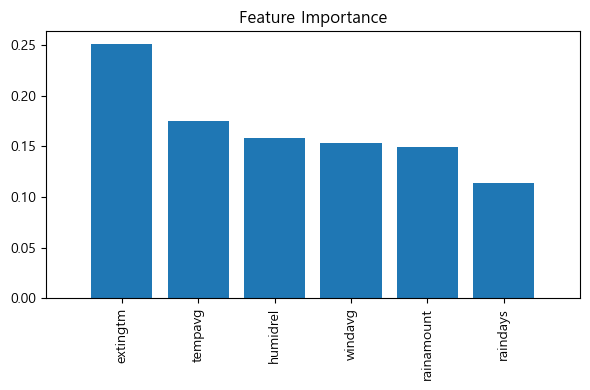

In [11]:
importances = forest.feature_importances_

# Get indices to sort the importances in descending order
indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))


plt.figure(figsize=(6, 4))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')


plt.xticks(range(X_train.shape[1]), np.array(feat_labels)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 5. Finding the Optimal Number of Clusters Using the Elbow Method

I calculated the Within-Cluster Sum of Squares (WCSS) for cluster counts from 1 to 10 and trained the KMeans model for each count. I then plotted the WCSS values to visualize the Elbow Method and determined that the optimal number of clusters is five.

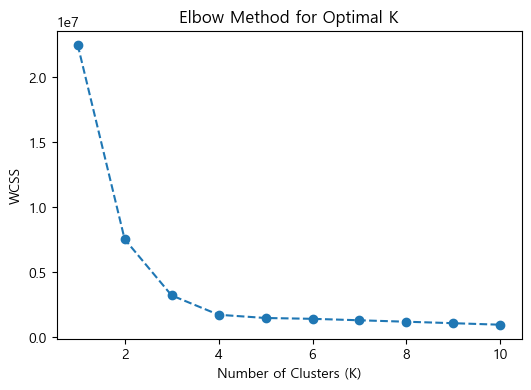

In [12]:
from sklearn.cluster import KMeans

X = df[['tempavg', 'windavg', 'rainamount', 'raindays', 'humidrel', 'extingtm']]

# List to store the WCSS values
wcss = []

# Train KMeans model and calculate WCSS 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  

# Visualize the WCSS values to check the Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

## 6. Clustering and Labeling Damage Areas

I applied KMeans clustering with five clusters to the dmgarea feature and labeled each cluster based on the mean damage area, categorizing them as "Negligible Damage," "Minor Damage," "Moderate Damage," "High Damage," and "Severe Damage." 

I also assigned custom colors to each damage category.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm


X_dmgarea = df[['dmgarea']]

# Create a KMeans clustering model and perform clustering 
kmeans_dmgarea = KMeans(n_clusters=5, random_state=0)
df['Cluster_dmgarea'] = kmeans_dmgarea.fit_predict(X_dmgarea)

# Sort the clusters and define labels
cluster_means = df.groupby('Cluster_dmgarea')['dmgarea'].mean().sort_values()
sorted_clusters = cluster_means.index
cluster_labels = {
    sorted_clusters[0]: "Negligible Damage",
    sorted_clusters[1]: "Minor Damage",
    sorted_clusters[2]: "Moderate Damage",
    sorted_clusters[3]: "High Damage",
    sorted_clusters[4]: "Severe Damage"
}
df['Cluster_Label'] = df['Cluster_dmgarea'].map(cluster_labels)

# Define custom color for the clusters
custom_palette = {
    "Negligible Damage": "green",
    "Minor Damage": "lightgreen",
    "Moderate Damage": "yellow",
    "High Damage": "orange",
    "Severe Damage": "red"
}

C:\Users\82109\AppData\Local\Temp\ipykernel_1700\735080485.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_dmgarea'] = kmeans_dmgarea.fit_predict(X_dmgarea)
C:\Users\82109\AppData\Local\Temp\ipykernel_1700\735080485.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_Label'] = df['Cluster_dmgarea'].map(cluster_labels)


## 7. Visualization of Damage Area Clusters

I created two plots to visualize the clustering results. The first plot is a stacked histogram showing the distribution of damage areas by cluster, while the second plot is a bar chart displaying the sizes of each cluster. 

The clusters appear well-separated, with "Negligible Damage" representing the largest portion of the dataset.

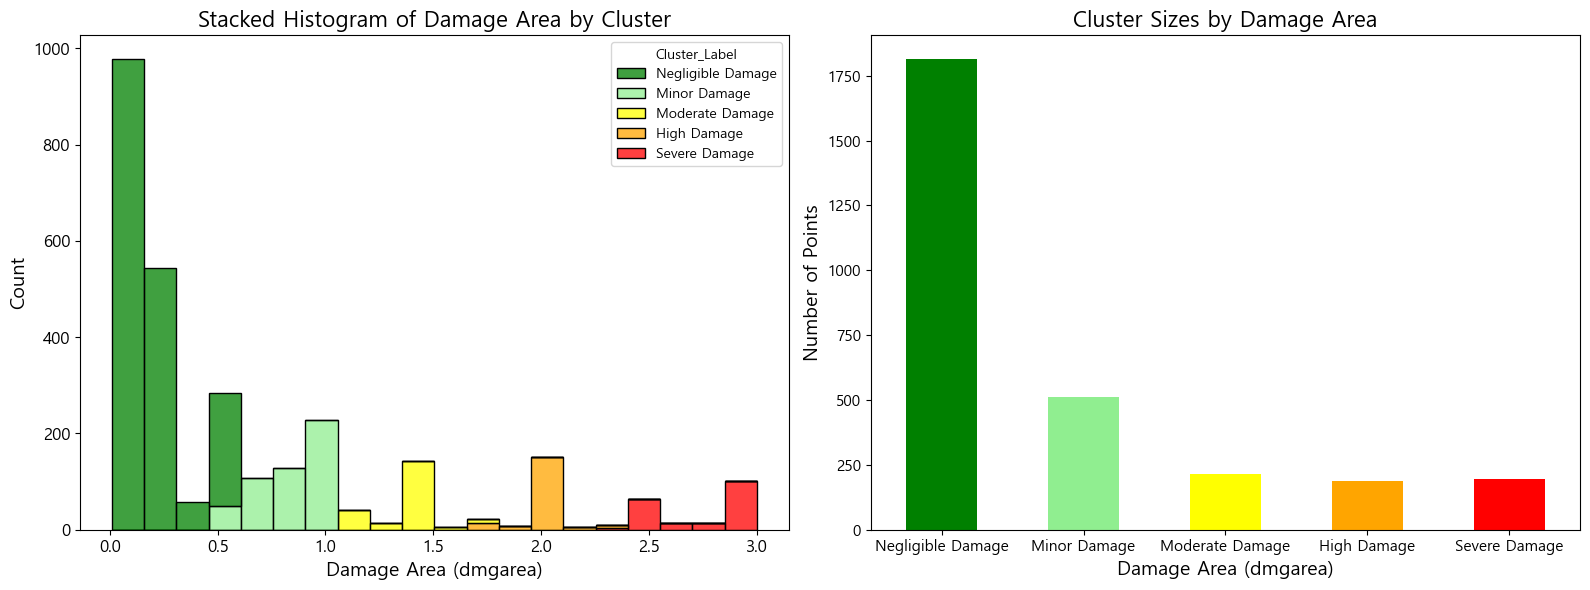

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked Histogram
sns.histplot(data=df, x='dmgarea', hue='Cluster_Label', multiple='stack', palette=custom_palette, bins=20, ax=ax1)
ax1.set_title('Stacked Histogram of Damage Area by Cluster', fontsize=16)
ax1.set_xlabel('Damage Area (dmgarea)', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

# Bar chart for cluster sizes
cluster_counts = df['Cluster_Label'].value_counts().reindex([cluster_labels[cluster] for cluster in sorted_clusters])
cluster_counts.plot(kind='bar', color=[custom_palette[label] for label in cluster_counts.index], ax=ax2)
ax2.set_title('Cluster Sizes by Damage Area', fontsize=16)
ax2.set_xlabel('Damage Area (dmgarea)', fontsize=14)
ax2.set_ylabel('Number of Points', fontsize=14)
ax2.set_xticks(range(len(cluster_counts)))
ax2.set_xticklabels(cluster_counts.index, rotation=0, fontsize=12)


ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=11)

plt.tight_layout()
plt.show()

## 8. Cluster Statistics and Damage Area Ranges

I calculated the average feature values and key statistics for dmgarea within each cluster. This helped in understanding the characteristics and distribution of damage across the clusters.

The results show that as damage severity increases from "Negligible" to "Severe Damage," there is a consistent rise in average temperatures, wind speeds, rain amounts, and extinguishing times.

In [15]:
# Calculate cluster statistics and ranges
cluster_means_data = df.groupby('Cluster_Label')[['tempavg', 'windavg', 'rainamount', 'raindays', 'humidrel', 'extingtm']].mean().reindex(cluster_labels.values())
dmgarea_ranges = df.groupby('Cluster_Label')['dmgarea'].agg(['min', 'max', 'mean', 'std', 'count']).reindex(cluster_labels.values())


print("Cluster Means by Label:")
print(cluster_means_data.to_string(header=True))
print("\nDmgarea Ranges by Cluster:")
print(dmgarea_ranges.to_string(header=True))

Cluster Means by Label:
                     tempavg   windavg  rainamount  raindays   humidrel    extingtm
Cluster_Label                                                                      
Negligible Damage  13.871503  3.152738    4.044552  8.514665  37.437686  103.437600
Minor Damage       14.450391  3.294336    4.417578  8.302844  34.342578  126.017578
Moderate Damage    15.260094  3.438404    4.343662  8.244131  33.172300  157.347418
High Damage        15.110753  3.528387    4.909077  9.139785  35.362366  171.879686
Severe Damage      15.735025  3.712995    5.552284  8.964467  33.492893  191.649746

Dmgarea Ranges by Cluster:
                    min   max      mean       std  count
Cluster_Label                                           
Negligible Damage  0.01  0.52  0.185945  0.158958   1815
Minor Damage       0.60  1.10  0.856465  0.147368    512
Moderate Damage    1.15  1.70  1.436244  0.135556    213
High Damage        1.80  2.30  1.997849  0.089417    186
Severe Damage     

## 9. Silhouette Analysis of Clusters

I created a silhouette plot to assess the quality of clustering for five clusters, and the overall silhouette score was approximately 0.70, indicating good separation between the clusters. 

The "Negligible Damage" cluster has the widest silhouette, while smaller clusters like "Severe" and "High Damage" have narrower regions. The red dashed line indicates the average silhouette score, showing good cluster separation overall.

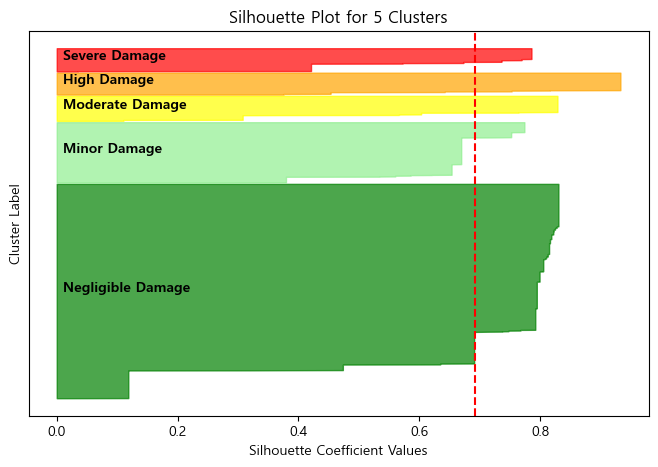

Silhouette Score: 0.6924175537719929


In [16]:
# Calculate silhouette score and values
silhouette_avg = silhouette_score(X_dmgarea, df['Cluster_dmgarea'])
silhouette_vals = silhouette_samples(X_dmgarea, df['Cluster_dmgarea'])

# Silhouette Plot
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
y_lower = 10
for i in sorted_clusters:
    ith_cluster_silhouette_vals = silhouette_vals[df['Cluster_dmgarea'] == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = custom_palette[cluster_labels[i]]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, 
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(+0.01, y_lower + 0.5 * size_cluster_i, cluster_labels[i], 
             fontsize=10, weight='bold', color='black')
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title(f'Silhouette Plot for 5 Clusters')
ax1.set_xlabel('Silhouette Coefficient Values')
ax1.set_ylabel('Cluster Label')
ax1.set_yticks([])

plt.show()

print(f'Silhouette Score: {silhouette_avg}')